## Recipe 15 
## Replacing missing values by a value at the end of the distribution

In this recipe, we will replace missing values by a value at the end of the distribution, estimated with the Gaussian approximation or the inter-quantal range proximity rule, using pandas and Feature-Engine.

In [2]:
import numpy as np
import pandas as pd

# to split the datasets
from sklearn.model_selection import train_test_split

# to impute missing data with feature-engine
# from feature_engine.missing_data_imputers import EndTailImputer
from feature_engine.imputation import EndTailImputer

In [3]:
# load data
data = pd.read_csv('creditApprovalUCI.csv')
data.head()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,A16
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,202.0,0,1
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,43.0,560,1
2,a,24.50,NaN,u,g,q,h,NaN,NaN,NaN,0,f,g,280.0,824,1
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,100.0,3,1
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,120.0,0,1


In [4]:
# let's separate into training and testing set

X_train, X_test, y_train, y_test = train_test_split(
    data.drop('A16', axis=1), data['A16'], test_size=0.3, random_state=0)

X_train.shape, X_test.shape

((483, 15), (207, 15))

In [5]:
# find the percentage of missing data per variable

X_train.isnull().mean()

A1     0.008282
A2     0.022774
A3     0.140787
A4     0.008282
A5     0.008282
A6     0.008282
A7     0.008282
A8     0.140787
A9     0.140787
A10    0.140787
A11    0.000000
A12    0.000000
A13    0.000000
A14    0.014493
A15    0.000000
dtype: float64

In [6]:
# replace NA in indicated numerical variables
# using inter-quantal range proximity rule 

for var in ['A2', 'A3', 'A8', 'A11', 'A15']:

    IQR = X_train[var].quantile(0.75) - X_train[var].quantile(0.25)
    value = X_train[var].quantile(0.75) + 1.5 * IQR

    X_train[var] = X_train[var].fillna(value)
    X_test[var] = X_test[var].fillna(value)

In [7]:
# check absence of missing values
X_train[['A2', 'A3', 'A8', 'A11', 'A15']].isnull().sum()

A2     0
A3     0
A8     0
A11    0
A15    0
dtype: int64

In [8]:
# let's separate into training and testing sets

X_train, X_test, y_train, y_test = train_test_split(
    data.drop('A16', axis=1), data['A16'], test_size=0.3, random_state=0)

In [9]:
# let's create a median imputer

imputer = EndTailImputer(imputation_method='gaussian', tail='right',
                         variables=['A2', 'A3', 'A8', 'A11', 'A15'])

imputer.fit(X_train)


EndTailImputer(variables=['A2', 'A3', 'A8', 'A11', 'A15'])

In [10]:
# dictionary with the mappings for each variable
imputer.imputer_dict_

{'A2': 68.35771260807589,
 'A3': 19.98993346546277,
 'A8': 12.418567732660225,
 'A11': 18.320547522636247,
 'A15': 12740.850618383225}

In [11]:
# transform the data
X_train = imputer.transform(X_train)
X_test = imputer.transform(X_test)

In [12]:
# check that null values were replaced
X_train[['A2', 'A3', 'A8', 'A11', 'A15']].isnull().mean()

A2     0.0
A3     0.0
A8     0.0
A11    0.0
A15    0.0
dtype: float64

In [13]:
# transform the data
X_train = imputer.transform(X_train)
X_test = imputer.transform(X_test)

## Recipe 16
## Random Sample Imputation

In this recipe, we will perform random sample imputation using pandas and Feature Engine.

In [14]:
# to impute missing data with feature-engine

from feature_engine.imputation import RandomSampleImputer

In [15]:
# load data
data = pd.read_csv('creditApprovalUCI.csv')
data.head()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,A16
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,202.0,0,1
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,43.0,560,1
2,a,24.50,NaN,u,g,q,h,NaN,NaN,NaN,0,f,g,280.0,824,1
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,100.0,3,1
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,120.0,0,1


In [16]:
# let's separate into training and testing sets

X_train, X_test, y_train, y_test = train_test_split(
    data.drop('A16', axis=1), data['A16'], test_size=0.3, random_state=0)

X_train.shape, X_test.shape

((483, 15), (207, 15))

In [17]:
# find the percentage of missing data within those variables

X_train.isnull().mean()

A1     0.008282
A2     0.022774
A3     0.140787
A4     0.008282
A5     0.008282
A6     0.008282
A7     0.008282
A8     0.140787
A9     0.140787
A10    0.140787
A11    0.000000
A12    0.000000
A13    0.000000
A14    0.014493
A15    0.000000
dtype: float64

In [18]:
# extract a random sample (as many values as missing values in the variable)

number_missing_values = X_train['A2'].isnull().sum()
number_missing_values

11

In [19]:
# extract a random sample (as many values as missing values in the variable)

random_sample_train = X_train['A2'].dropna().sample(number_missing_values, random_state=0)

In [20]:
# re-index the random sample so that we can join it to our original data

random_sample_train.index = X_train[X_train['A2'].isnull()].index

random_sample_train.index

Int64Index([97, 500, 329, 83, 254, 608, 445, 450, 515, 286, 86], dtype='int64')

In [21]:
# replace the missing values
X_train.loc[X_train['A2'].isnull(), 'A2'] = random_sample_train

X_train['A2'].isnull().sum()

0

In [22]:
# repeat in a loop for the rest of the variables
# and for both train and test set

for var in ['A1', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8']:

    # extract a random sample
    random_sample_train = X_train[var].dropna().sample(
        X_train[var].isnull().sum(), random_state=0)

    random_sample_test = X_train[var].dropna().sample(
        X_test[var].isnull().sum(), random_state=0)

    # re index the random sample
    random_sample_train.index = X_train[X_train[var].isnull()].index
    random_sample_test.index = X_test[X_test[var].isnull()].index

    # replace the NA 
    X_train.loc[X_train[var].isnull(), var] = random_sample_train
    X_test.loc[X_test[var].isnull(), var] = random_sample_test
    
# check missing data
X_train[['A1', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8']].isnull().sum()

A1    0
A3    0
A4    0
A5    0
A6    0
A7    0
A8    0
dtype: int64

In [23]:
# let's separate into training and testing set

X_train, X_test, y_train, y_test = train_test_split(
    data.drop('A16', axis=1), data['A16'], test_size=0.3, random_state=0)

In [24]:
# let's create a random sample imputer

imputer = RandomSampleImputer()

imputer.fit(X_train)

RandomSampleImputer()

In [25]:
# the imputer stores the train set

imputer.X_.head()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15
596,a,46.08,3.000,u,g,c,v,2.375,t,t,8,t,g,396.0,4159
303,a,15.92,2.875,u,g,q,v,0.085,f,f,0,f,g,120.0,0
204,b,36.33,2.125,y,p,w,v,0.085,t,t,1,f,g,50.0,1187
351,b,22.17,0.585,y,p,ff,ff,0.000,f,f,0,f,g,100.0,0
118,b,57.83,7.040,u,g,m,v,14.000,t,t,6,t,g,360.0,1332


In [26]:
# transform the data - replace the missing values

X_train = imputer.transform(X_train)
X_test = imputer.transform(X_test)

In [27]:
# check that null values were replaced
X_train.isnull().mean()

A1     0.0
A2     0.0
A3     0.0
A4     0.0
A5     0.0
A6     0.0
A7     0.0
A8     0.0
A9     0.0
A10    0.0
A11    0.0
A12    0.0
A13    0.0
A14    0.0
A15    0.0
dtype: float64

In [28]:
# Random sample seeding with variable values
# let's separate into training and testing set

X_train, X_test, y_train, y_test = train_test_split(
    data.drop('A16', axis=1), data['A16'], test_size=0.3, random_state=0)

In [29]:
imputer_obs = RandomSampleImputer(random_state=['A8', 'A3'], seed='observation', seeding_method='add')

In [30]:
imputer_obs.fit(X_train)

RandomSampleImputer(random_state=['A8', 'A3'], seed='observation')

In [31]:
X_train_tt = imputer_obs.transform(X_train)
X_test_tt = imputer_obs.transform(X_test)

#Recipe 17
## Adding a missing value indicator variable

In this recipe, we will add binary variables to indicate that a value is missing using pandas, Scikit-learn and Feature-Engine, all open source Python libraries.

In [32]:
# to impute missing data with feature-engine
# from feature_engine.missing_data_imputers import AddNaNBinaryImputer

from feature_engine.imputation import AddMissingIndicator

In [33]:
# load data
data = pd.read_csv('creditApprovalUCI.csv')
data.head()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,A16
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,202.0,0,1
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,43.0,560,1
2,a,24.50,NaN,u,g,q,h,NaN,NaN,NaN,0,f,g,280.0,824,1
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,100.0,3,1
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,120.0,0,1


In [34]:
# let's separate into training and testing sets

X_train, X_test, y_train, y_test = train_test_split(
    data.drop('A16', axis=1), data['A16'], test_size=0.3, random_state=0)

X_train.shape, X_test.shape

((483, 15), (207, 15))

In [35]:
# find the percentage of missing data within those variables

X_train.isnull().mean()

A1     0.008282
A2     0.022774
A3     0.140787
A4     0.008282
A5     0.008282
A6     0.008282
A7     0.008282
A8     0.140787
A9     0.140787
A10    0.140787
A11    0.000000
A12    0.000000
A13    0.000000
A14    0.014493
A15    0.000000
dtype: float64

In [36]:
# add missing indicator

for var in ['A1', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8']:

    X_train[var+'_NA'] = np.where(X_train[var].isnull(), 1, 0)
    X_test[var+'_NA'] = np.where(X_test[var].isnull(), 1, 0)

    
# check the new missing indicator variables
X_train.head()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,...,A13,A14,A15,A1_NA,A3_NA,A4_NA,A5_NA,A6_NA,A7_NA,A8_NA
596,a,46.08,3.000,u,g,c,v,2.375,t,t,...,g,396.0,4159,0,0,0,0,0,0,0
303,a,15.92,2.875,u,g,q,v,0.085,f,f,...,g,120.0,0,0,0,0,0,0,0,0
204,b,36.33,2.125,y,p,w,v,0.085,t,t,...,g,50.0,1187,0,0,0,0,0,0,0
351,b,22.17,0.585,y,p,ff,ff,0.000,f,f,...,g,100.0,0,0,0,0,0,0,0,0
118,b,57.83,7.040,u,g,m,v,14.000,t,t,...,g,360.0,1332,0,0,0,0,0,0,0


In [37]:
# the mean of the missing indicator should be the same as the 
# percentage of missing values in the original variable

X_train['A3'].isnull().mean(), X_train['A3_NA'].mean()

(0.14078674948240166, 0.14078674948240166)

In [38]:
# let's separate into training and testing set

X_train, X_test, y_train, y_test = train_test_split(
    data.drop('A16', axis=1), data['A16'], test_size=0.3, random_state=0)

In [39]:
# let's create a random sample imputer

imputer = AddMissingIndicator()

# set up the imputer
# imputer = AddMissingIndicator( variables=['Alley', 'MasVnrType', 'LotFrontage', 'MasVnrArea'])


imputer.fit(X_train)

AddMissingIndicator()

In [40]:
# transform the data - replace the missing values

X_train = imputer.transform(X_train)
X_test = imputer.transform(X_test)

In [41]:
# check that null values were replaced
X_train.head()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,...,A2_na,A3_na,A4_na,A5_na,A6_na,A7_na,A8_na,A9_na,A10_na,A14_na
596,a,46.08,3.000,u,g,c,v,2.375,t,t,...,0,0,0,0,0,0,0,0,0,0
303,a,15.92,2.875,u,g,q,v,0.085,f,f,...,0,0,0,0,0,0,0,0,0,0
204,b,36.33,2.125,y,p,w,v,0.085,t,t,...,0,0,0,0,0,0,0,0,0,0
351,b,22.17,0.585,y,p,ff,ff,0.000,f,f,...,0,0,0,0,0,0,0,0,0,0
118,b,57.83,7.040,u,g,m,v,14.000,t,t,...,0,0,0,0,0,0,0,0,0,0


In [42]:
from sklearn.impute import MissingIndicator
from sklearn.model_selection import train_test_split

In [43]:
data = pd.read_csv('creditApprovalUCI.csv')

In [44]:
X_train, X_test, y_train, y_test = train_test_split(
    data.drop('A16', axis=1), data['A16'], test_size=0.3, random_state=0)

In [45]:
indicator = MissingIndicator(error_on_new=True, features='missing-only')
indicator.fit(X_train)  

MissingIndicator()

In [46]:
# we can see the features with na:
# the result shows the column index in the NumPy array

indicator.features_

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 13], dtype=int64)

In [47]:
# with Sklearn we need to join the missing indicators dataframe
# to the original X_train

# let's create a column name for each of the new MissingIndicators
indicator_cols = [c+'_NA' for c in X_train.columns[indicator.features_]]

# and now let's concatenate the original dataset with the missing indicators
X_train = pd.concat([
    X_train.reset_index(),
    pd.DataFrame(indicator.transform(X_train), columns = indicator_cols)],
    axis=1)

X_train.head()

,index,A1,A2,A3,A4,A5,A6,A7,A8,A9,...,A2_NA,A3_NA,A4_NA,A5_NA,A6_NA,A7_NA,A8_NA,A9_NA,A10_NA,A14_NA
0,596,a,46.08,3.000,u,g,c,v,2.375,t,...,False,False,False,False,False,False,False,False,False,False
1,303,a,15.92,2.875,u,g,q,v,0.085,f,...,False,False,False,False,False,False,False,False,False,False
2,204,b,36.33,2.125,y,p,w,v,0.085,t,...,False,False,False,False,False,False,False,False,False,False
3,351,b,22.17,0.585,y,p,ff,ff,0.000,f,...,False,False,False,False,False,False,False,False,False,False
4,118,b,57.83,7.040,u,g,m,v,14.000,t,...,False,False,False,False,False,False,False,False,False,False


## Recipe 18
# Performing multivariate imputation with MICE, KNN or Random Forests

In [48]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import BayesianRidge

from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

In [49]:
# load data with numerical variables

variables = ['A2','A3','A8', 'A11', 'A14', 'A15', 'A16']

data = pd.read_csv('creditApprovalUCI.csv', usecols=variables)

data.head()

,A2,A3,A8,A11,A14,A15,A16
0,30.83,0.000,1.25,1,202.0,0,1
1,58.67,4.460,3.04,6,43.0,560,1
2,24.50,NaN,NaN,0,280.0,824,1
3,27.83,1.540,3.75,5,100.0,3,1
4,20.17,5.625,1.71,0,120.0,0,1


In [50]:
# let's separate into training and testing set

X_train, X_test, y_train, y_test = train_test_split(
    data.drop('A16', axis=1), data['A16'], test_size=0.3, random_state=0)

X_train.shape, X_test.shape

((483, 6), (207, 6))

In [51]:
# find the percentage of missing data within those variables

X_train.isnull().mean()

A2     0.022774
A3     0.140787
A8     0.140787
A11    0.000000
A14    0.014493
A15    0.000000
dtype: float64

In [52]:
# let's create a MICE imputer using Bayes as estimator
imputer = IterativeImputer(estimator= BayesianRidge(),
                           max_iter=10, random_state=0)

In [53]:
imputer.fit(X_train)

IterativeImputer(estimator=BayesianRidge(), random_state=0)

In [54]:
# transform the data - replace the missing values

X_train = imputer.transform(X_train)
X_test = imputer.transform(X_test)

In [55]:
pd.DataFrame(X_train).isnull().sum()

0    0
1    0
2    0
3    0
4    0
5    0
dtype: int64

In [56]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import BayesianRidge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.neighbors import KNeighborsRegressor

In [57]:
X_train, X_test, y_train, y_test = train_test_split(
    data.drop('A16', axis=1), data['A16'], test_size=0.3, random_state=0)

X_train.shape, X_test.shape

((483, 6), (207, 6))

In [58]:
imputer_bayes = IterativeImputer(estimator=BayesianRidge(),
                                 max_iter=10,
                                 random_state=0)

imputer_knn = IterativeImputer(estimator=KNeighborsRegressor(n_neighbors=5),
                                 max_iter=10,
                                 random_state=0)

imputer_nonLin = IterativeImputer(estimator=DecisionTreeRegressor(max_features='sqrt', random_state=0),
                                 max_iter=10,
                                 random_state=0)

imputer_missForest = IterativeImputer(estimator=ExtraTreesRegressor(n_estimators=10, random_state=0),
                                 max_iter=10,
                                 random_state=0)

In [59]:
imputer_bayes.fit(X_train)
imputer_knn.fit(X_train)
imputer_nonLin.fit(X_train)
imputer_missForest.fit(X_train)

c:\Python310\lib\site-packages\sklearn\impute\_iterative.py:699: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(
c:\Python310\lib\site-packages\sklearn\impute\_iterative.py:699: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


IterativeImputer(estimator=ExtraTreesRegressor(n_estimators=10, random_state=0),
                 random_state=0)

In [60]:
X_train_bayes = imputer_bayes.transform(X_train)
X_train_knn = imputer_knn.transform(X_train)
X_train_nonLin = imputer_nonLin.transform(X_train)
X_train_missForest = imputer_missForest.transform(X_train)

In [61]:
predictors = [var for var in variables if var !='A16']

In [62]:
X_train_bayes = pd.DataFrame(X_train_bayes, columns = predictors)
X_train_knn = pd.DataFrame(X_train_knn, columns = predictors)
X_train_nonLin = pd.DataFrame(X_train_nonLin, columns = predictors)
X_train_missForest = pd.DataFrame(X_train_missForest, columns = predictors)

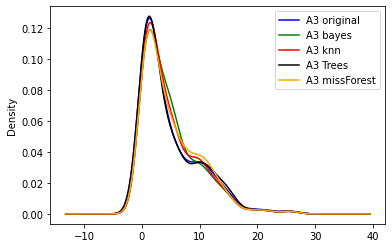

In [63]:
fig = plt.figure()
ax = fig.add_subplot(111)

X_train['A3'].plot(kind='kde', ax=ax, color='blue')
X_train_bayes['A3'].plot(kind='kde', ax=ax, color='green')
X_train_knn['A3'].plot(kind='kde', ax=ax, color='red')
X_train_nonLin['A3'].plot(kind='kde', ax=ax, color='black')
X_train_missForest['A3'].plot(kind='kde', ax=ax, color='orange')

# add legends
lines, labels = ax.get_legend_handles_labels()
labels = ['A3 original', 'A3 bayes', 'A3 knn', 'A3 Trees', 'A3 missForest']
ax.legend(lines, labels, loc='best')
plt.show()

##Recipe 19

## Assembling an imputation pipeline with Scikit-learn

In [64]:
# just for reference - 
import pandas as pd

# to impute missing data with sklearn
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

# to split the data sets
from sklearn.model_selection import train_test_split

In [65]:
# load data
data = pd.read_csv('creditApprovalUCI.csv')
data.head()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,A16
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,202.0,0,1
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,43.0,560,1
2,a,24.50,NaN,u,g,q,h,NaN,NaN,NaN,0,f,g,280.0,824,1
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,100.0,3,1
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,120.0,0,1


In [66]:
# let's separate into training and testing sets

X_train, X_test, y_train, y_test = train_test_split(
    data.drop('A16', axis=1), data['A16'], test_size=0.3, random_state=0)

X_train.shape, X_test.shape

((483, 15), (207, 15))

In [67]:
# find categorical variables
cat_cols = [c for c in data.columns if data[c].dtypes=='O']
data[cat_cols].isnull().mean().sort_values()

A12    0.000000
A13    0.000000
A4     0.008696
A5     0.008696
A6     0.013043
A7     0.013043
A1     0.017391
A9     0.133333
A10    0.133333
dtype: float64

In [68]:
# find numerical variables
num_cols = [c for c in data.columns if data[c].dtypes!='O']
data[num_cols].isnull().mean().sort_values()

A11    0.000000
A15    0.000000
A16    0.000000
A2     0.017391
A14    0.018841
A3     0.133333
A8     0.133333
dtype: float64

In [69]:
# find the percentage of missing data within those variables

X_train.isnull().mean()

A1     0.008282
A2     0.022774
A3     0.140787
A4     0.008282
A5     0.008282
A6     0.008282
A7     0.008282
A8     0.140787
A9     0.140787
A10    0.140787
A11    0.000000
A12    0.000000
A13    0.000000
A14    0.014493
A15    0.000000
dtype: float64

In [70]:
# we make a list with the numerical vars
features_num_arbitrary = ['A3', 'A8']
features_num_median = ['A2', 'A14']

# we make a list with the categorical vars
features_cat_frequent = ['A4', 'A5', 'A6', 'A7']
features_cat_missing = ['A1', 'A9', 'A10']

In [71]:
# we instantiate each imputer within a pipeline

imputer_num_arbitrary = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value=99)),
])

imputer_num_median = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
])

imputer_cat_frequent = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
])

imputer_cat_missing = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='Missing')),
])

In [72]:
# then we put the features list and imputers in the column transformer

preprocessor = ColumnTransformer(transformers=[
    ('imp_num_arbitrary', imputer_num_arbitrary, features_num_arbitrary),
    ('imp_num_median', imputer_num_median, features_num_median),
    ('imp_cat_frequent', imputer_cat_frequent, features_cat_frequent),
    ('imp_cat_missing', imputer_cat_missing, features_cat_missing),
    ], remainder='passthrough')

In [73]:
# now we fit the preprocessor
preprocessor.fit(X_train)

ColumnTransformer(remainder='passthrough',
                  transformers=[('imp_num_arbitrary',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(fill_value=99,
                                                                strategy='constant'))]),
                                 ['A3', 'A8']),
                                ('imp_num_median',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='median'))]),
                                 ['A2', 'A14']),
                                ('imp_cat_frequent',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='most_frequent'))]),
                                 ['A4', 'A5', 'A6', 'A7']),
                                ('imp_cat_missing',
                                 Pipeline(steps=[('imputer

In [74]:
# and now we impute the data
X_train = preprocessor.transform(X_train)
X_test = preprocessor.transform(X_test)

In [75]:
pd.DataFrame(X_train).isnull().sum()

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
dtype: int64

In [76]:
pd.DataFrame(X_test).isnull().sum()

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
dtype: int64